# Importing all necessary libraries and modules

In [1]:
%pip install imageio

import os
import cv2
import time
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import sys
import imageio

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

Note: you may need to restart the kernel to use updated packages.


# Loading and pre-processing the Dataset

In [ ]:
BASE_PATH = "./CrashBest/"
TABLENAME = "./Crash_Table.csv"

df = pd.read_csv(TABLENAME)
arr = []

for ind in df.index:
    for i in range(1, 51):
        arr.append(df[f"frame_{i}"][ind])

print(f"Images found : {len(arr)}")

dataset = keras.preprocessing.image_dataset_from_directory(BASE_PATH, labels=arr, batch_size=128, label_mode='int')

print(df.columns)

Images found : 150
Found 150 files belonging to 2 classes.
Index(['vidname', 'frame_1', 'frame_2', 'frame_3', 'frame_4', 'frame_5',
       'frame_6', 'frame_7', 'frame_8', 'frame_9', 'frame_10', 'frame_11',
       'frame_12', 'frame_13', 'frame_14', 'frame_15', 'frame_16', 'frame_17',
       'frame_18', 'frame_19', 'frame_20', 'frame_21', 'frame_22', 'frame_23',
       'frame_24', 'frame_25', 'frame_26', 'frame_27', 'frame_28', 'frame_29',
       'frame_30', 'frame_31', 'frame_32', 'frame_33', 'frame_34', 'frame_35',
       'frame_36', 'frame_37', 'frame_38', 'frame_39', 'frame_40', 'frame_41',
       'frame_42', 'frame_43', 'frame_44', 'frame_45', 'frame_46', 'frame_47',
       'frame_48', 'frame_49', 'frame_50'],
      dtype='object')


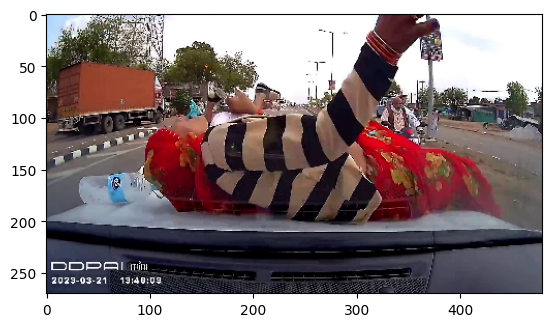

In [ ]:
FILENAME = "/C_000001_"
FRAME = "35"
SCALE = 4

img = cv2.imread(BASE_PATH + FILENAME + FRAME + ".jpg")
plt.imshow(img[::SCALE,::SCALE,::-1])

# Normalizing the dataset

In [13]:
dataset = dataset.map(lambda x, y: (x / 255.0, y))

# Splitting the dataset into Testing and Training dataset

In [14]:
train_size = int(len(dataset) * 0.8)

train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)

# Displaying a Tensor Object

tf.Tensor(0, shape=(), dtype=int32)


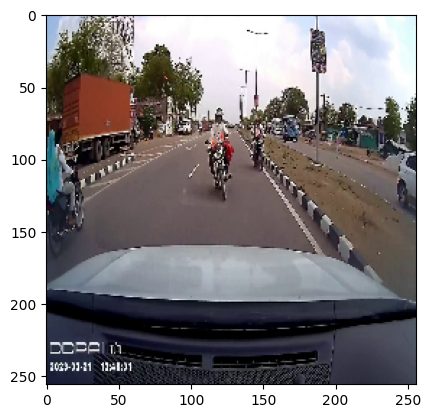

In [15]:
for t in train_ds.take(1):
    plt.imshow(t[0][0])
    print(t[1][0])

# MobileNet V2.0 Model Code

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def MobileNetV2(input_shape=(256, 256, 3), num_classes=1):
    inputs = tf.keras.Input(shape=input_shape)
    backbone = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')(inputs)
    x = layers.GlobalAveragePooling2D()(backbone)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs, name='MobileNetV2')
    return model

model = MobileNetV2()
model.summary()

C:\Users\vish2\AppData\Local\Temp\ipykernel_20236\4294107878.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  backbone = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')(inputs)


Model: "MobileNetV2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 2,387,969 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

# Model Compilation

In [ ]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics = ['binary_accuracy'])

start_time = time.time()
history=model.fit(train_ds, epochs=10, verbose=1, validation_data=test_ds)
end_time = time.time()

training_time = end_time - start_time

print("Time taken to train the neural network: {:.2f} seconds".format(training_time))

Epoch 1/10


# Accuracy and Loss

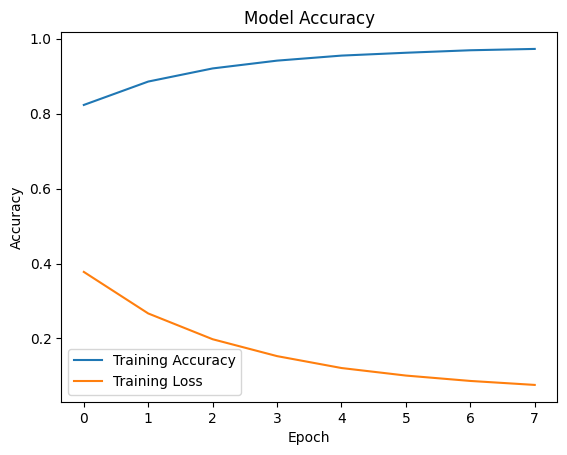

In [ ]:
def plot_accuracy(history):
    plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history)

# Testing with an input image

In [ ]:
model.save("mobilenetv2_model.h5")

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model1 = load_model('mobilenetv2_model.h5')

img_path = './CrashBest/C_000001_40.jpg'
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model1.predict(img_array)
threshold = 0.5
class_label = 1 if prediction[0] > threshold else 0

print(f"Predicted probability: {prediction[0][0]:.4f}")
print(f"Predicted class: {class_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted probability: 0.9975
Predicted class: 1
